<a href="https://colab.research.google.com/github/eduardova28/2025_UTEC_Programacion101/blob/main/IA_Fundamentals_HillClimbing_10052025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

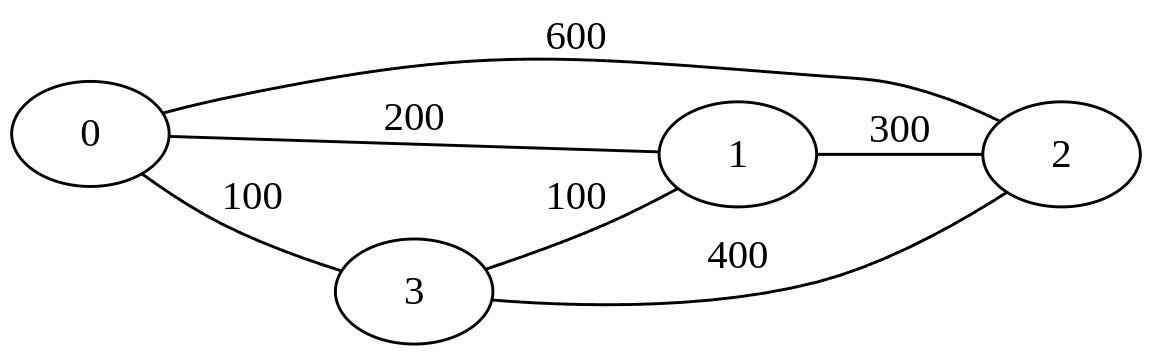

In [3]:
import numpy as np

TSP=[
    [0,200,600,100],
    [200,0,300,100],
    [600,300,0,400],
    [100,100,400,0],
]
#STEP 1
current_solution=np.array([0,1,2,3])
np.random.shuffle(current_solution)
print(current_solution)
#STEP 2


[3 0 1 2]


In [4]:
def fitness(sol):
  distance=0
  for i in range(len(sol)-1):
    distance=distance+TSP[sol[i]][sol[i+1]]

  return distance

print(fitness(current_solution))

600


In [5]:
def get_neighbors(sol):
  neighbors=[]
  for i in range(len(sol)-1):
    for j in range(i+1,len(sol)):
      new_sol=sol.copy()
      new_sol[i],new_sol[j]=new_sol[j],new_sol[i]
      neighbors.append(new_sol)
  return neighbors
print(current_solution)
print(get_neighbors(current_solution))

[3 0 1 2]
[array([0, 3, 1, 2]), array([1, 0, 3, 2]), array([2, 0, 1, 3]), array([3, 1, 0, 2]), array([3, 2, 1, 0]), array([3, 0, 2, 1])]


In [6]:
def hill_climbing():
  #Step 1: sol inicial
  current_solution=np.array([0,1,2,3])
  np.random.shuffle(current_solution)

  while True:
   #Step2:generas vecinos
    neighbors=get_neighbors(current_solution)
    best_neighbor=min(neighbors,key=fitness)
    print("Current solution",current_solution)
    print(fitness(current_solution))
    print("vecinos",neighbors)
    print("mejor vecino",fitness(best_neighbor))

    if fitness(best_neighbor)<fitness(current_solution):
      current_solution=best_neighbor
    else:
      return current_solution

solution=hill_climbing()
print("mejor ruta   ",solution)
print("mejor solucion   ",fitness(solution))


Current solution [2 3 0 1]
700
vecinos [array([3, 2, 0, 1]), array([0, 3, 2, 1]), array([1, 3, 0, 2]), array([2, 0, 3, 1]), array([2, 1, 0, 3]), array([2, 3, 1, 0])]
mejor vecino 600
Current solution [2 1 0 3]
600
vecinos [array([1, 2, 0, 3]), array([0, 1, 2, 3]), array([3, 1, 0, 2]), array([2, 0, 1, 3]), array([2, 3, 0, 1]), array([2, 1, 3, 0])]
mejor vecino 500
Current solution [2 1 3 0]
500
vecinos [array([1, 2, 3, 0]), array([3, 1, 2, 0]), array([0, 1, 3, 2]), array([2, 3, 1, 0]), array([2, 0, 3, 1]), array([2, 1, 0, 3])]
mejor vecino 600
mejor ruta    [2 1 3 0]
mejor solucion    500


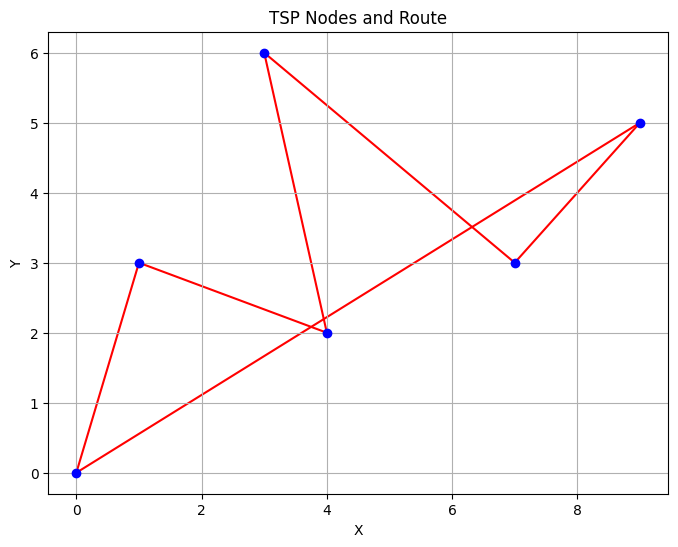

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

1.0338784960056222


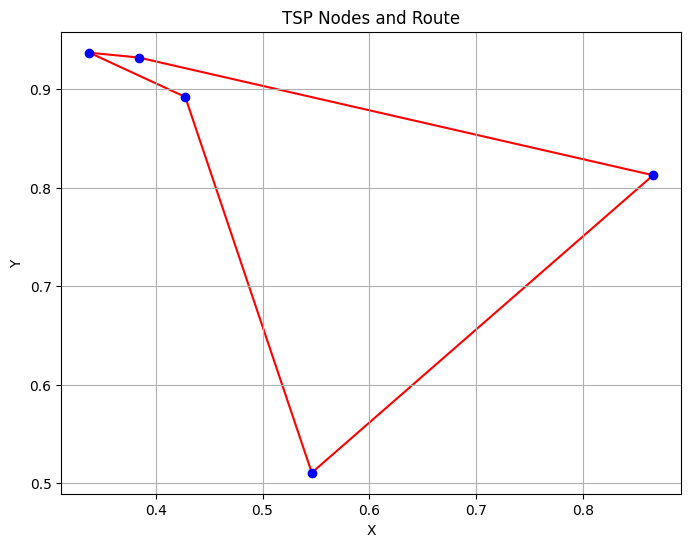

Iteration...
fitness current_solution 1.3817012473511034
fitness best_neighbor 0.9445109976584657

Iteration...
fitness current_solution 0.9445109976584657
fitness best_neighbor 0.9855674736367128


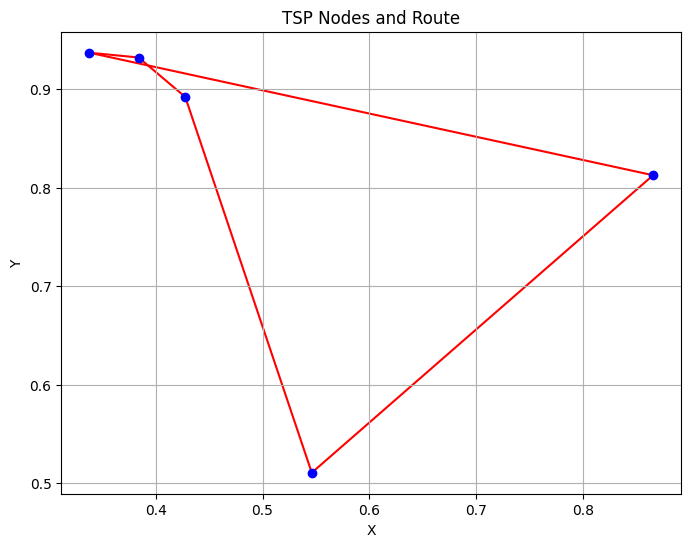


 'good' solution: [0 3 2 4 1]


In [16]:
N = 5 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades

def fitness(sol):
  distance=0
  for i in range(len(sol)-1):
    distance=distance+distances[sol[i]][sol[i+1]]

  return distance

print(fitness(current_solution))

def get_neighbors(sol):
  neighbors=[]
  for i in range(len(sol)-1):
    for j in range(i+1,len(sol)):
      new_sol=sol.copy()
      new_sol[i],new_sol[j]=new_sol[j],new_sol[i]
      neighbors.append(new_sol)
  return neighbors

def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array(range(N))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    #print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    #print("neighbors", neighbors)
    #print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)